![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


# Import any additional modules and start coding below

In [307]:
# Step : 1 Preprocessing the Data
# Read the CSV file

data = pd.read_csv("rental_info.csv")


When subtract one datetime object from another in pandas, you get a timedelta object, which represents the difference in time between the two datetime objects. To extract specific components like days, months, or years from timedelta objects, you can use .dt accessor followed by the specific component you want to extract.

For example:

.dt.days extracts the number of days.
.dt.seconds extracts the number of seconds.
.dt.minutes extracts the number of minutes.
.dt.months extracts the number of months.
.dt.years extracts the number of years.
These allow you to work with datetime data more flexibly and extract the specific information you need for analysis or manipulation.


In [308]:
# Calculate rental in days
data['rental_date'] = pd.to_datetime(data['rental_date'])
data['return_date'] = pd.to_datetime(data['return_date'])
data['rental_length_days'] = (data['return_date'] - data['rental_date']).dt.days

In [309]:
# Create dummy variable for special_features
data['deleted_scenes'] = data['special_features'].apply(lambda x: 1 if 'Deleted Scenes' in x else 0)
data['behind_the_scenes'] = data['special_features'].apply(lambda x: 1 if 'Behind the Scenes' in x else 0)



This line of code is using a lambda function within the `apply` method to create a new column called "deleted_scenes" in the DataFrame `data`. Let's break down what each part does:

1. `lambda x: 1 if 'Deleted Scenes' in x else 0`: This is a lambda function. It takes an input `x` (which in this case represents each value in the "special_features" column of the DataFrame) and returns 1 if the substring 'Deleted Scenes' is found in `x`, and 0 otherwise. So, it's essentially a short way of writing a simple if-else condition.

2. `data['special_features'].apply(...)`: The `apply` method applies a function along an axis of the DataFrame. In this case, it's applying the lambda function to each value in the "special_features" column.

3. `data['deleted_scenes'] = ...`: This assigns the result of the `apply` method (which is a Series of 1s and 0s indicating the presence of "Deleted Scenes" in each row of the "special_features" column) to a new column named "deleted_scenes" in the DataFrame `data`.

So, overall, this line of code creates a new binary column "deleted_scenes" in the DataFrame `data`, where the value is 1 if "Deleted Scenes" is present in the "special_features" column for that row, and 0 otherwise.

In [310]:
# step 2 : Creating Feature Set(X) and Target Variable (y)

X = pd.DataFrame(data[['release_year', 'rental_rate', 'length', 'replacement_cost', 'NC-17', 'PG', 'PG-13', 'R', 'amount_2', 'length_2', 'rental_rate_2', 'deleted_scenes', 'behind_the_scenes','rental_length_days']])
                      
y = pd.Series(data['rental_length_days'])

In [311]:
print(data.columns)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Confirm dimensions of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Index(['rental_date', 'return_date', 'amount', 'release_year', 'rental_rate',
       'length', 'replacement_cost', 'special_features', 'NC-17', 'PG',
       'PG-13', 'R', 'amount_2', 'length_2', 'rental_rate_2',
       'rental_length_days', 'deleted_scenes', 'behind_the_scenes'],
      dtype='object')
Missing Values:
rental_date           0
return_date           0
amount                0
release_year          0
rental_rate           0
length                0
replacement_cost      0
special_features      0
NC-17                 0
PG                    0
PG-13                 0
R                     0
amount_2              0
length_2              0
rental_rate_2         0
rental_length_days    0
deleted_scenes        0
behind_the_scenes     0
dtype: int64
Shape of X: (15861, 14)
Shape of y: (15861,)


In [312]:
# Step 3 : Splitting Data into Train and Test Sets
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =9 )

In [313]:
# Step 4 : Training a Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [314]:
# step 5 : Evaluating Model Performance
y_pred = model.predict(X_test)
mse = mse(y_test,y_pred)


In [315]:
# check if MSE is less than 3
if mse < 3:
    best_model = model
    best_mse = mse
    print("Best model found with MSE less than 3.")
else :
    print("No model found with MSE less than 3. Try a different model or adjust hyperparameters")

Best model found with MSE less than 3.


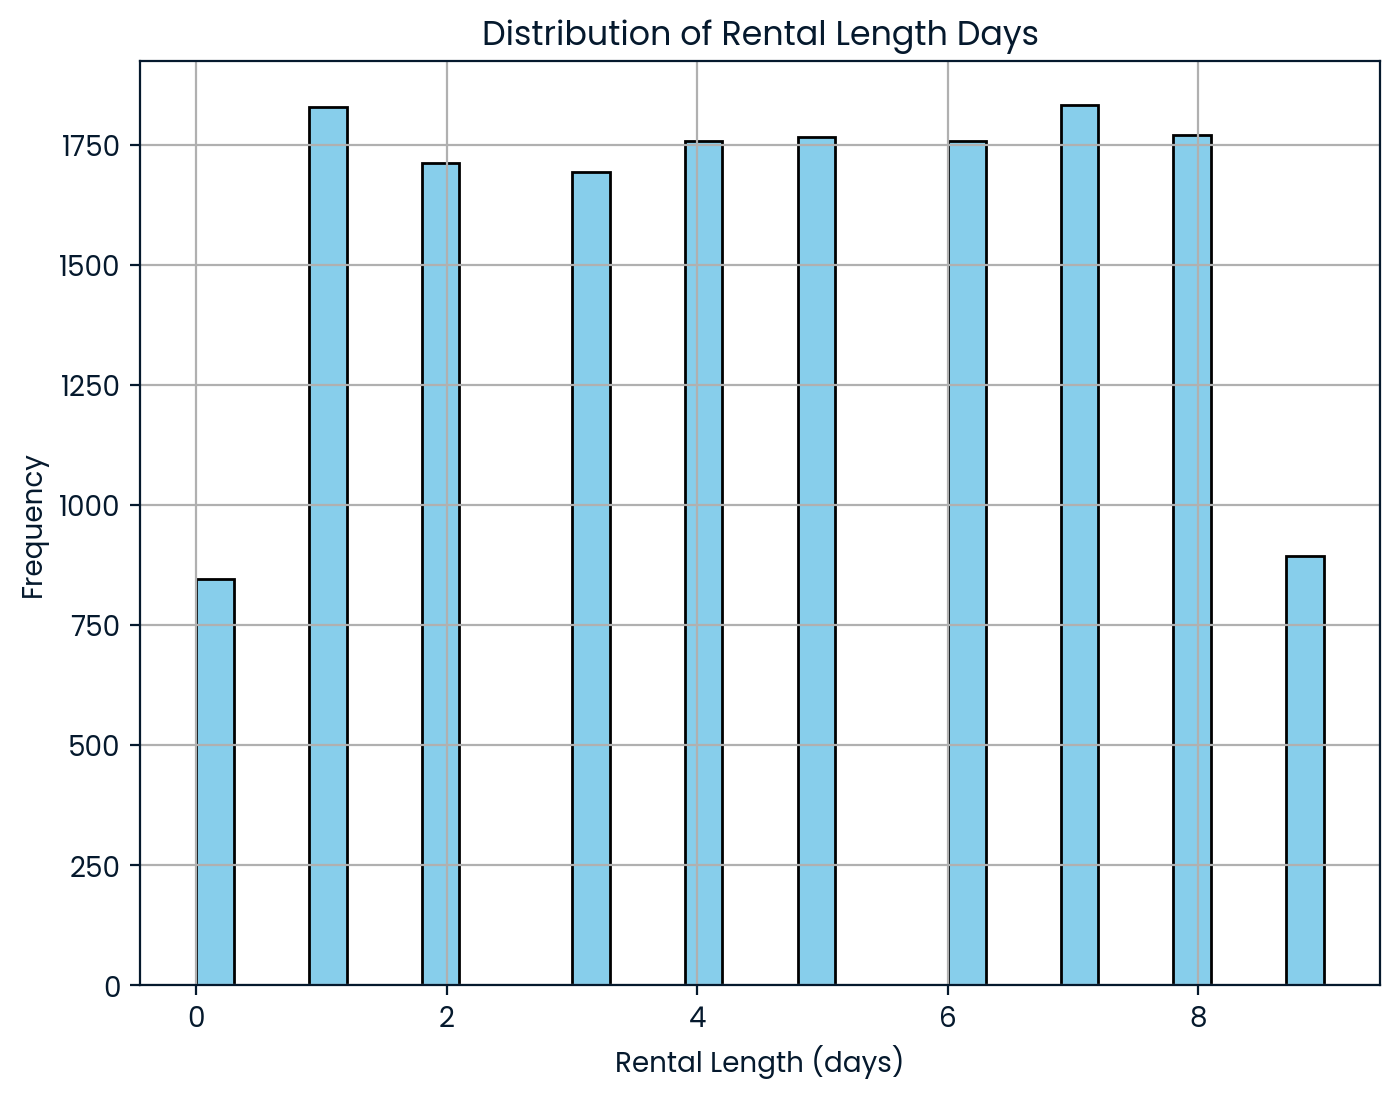

In [316]:

# Plot histogram of rental length days
plt.figure(figsize=(8, 6))
plt.hist(data['rental_length_days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Rental Length Days')
plt.xlabel('Rental Length (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
